IndentationError: unexpected indent (ipython-input-4-1244433217.py, line 56)


📊 Model Performance Comparison:

               Model        MAE       RMSE  R2_Score
0      Random Forest  30.260725  37.025568  0.981809
1  Linear Regression  21.518503  27.131980  0.990232
2            XGBoost  21.924866  28.576452  0.989164


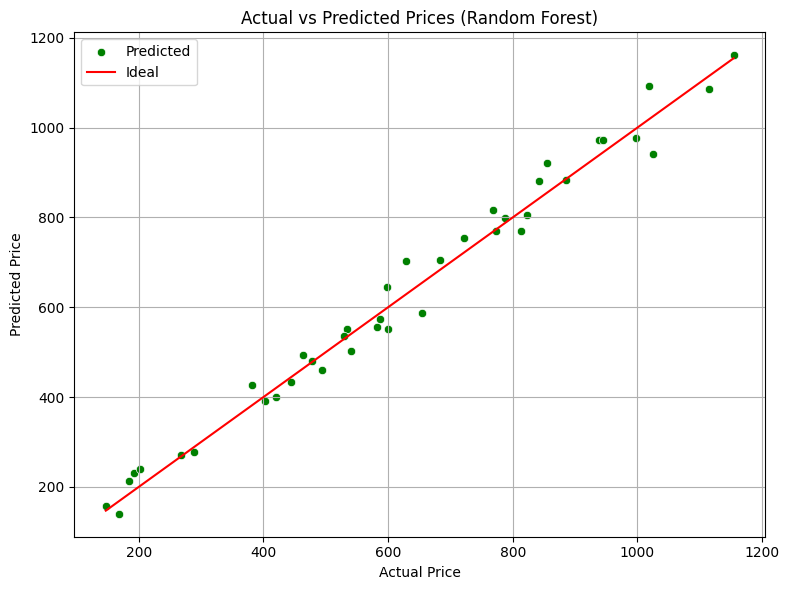

In [5]:
#  ML Project: Glass Item Price Prediction Using Synthetic Data

import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# 1. Generate Synthetic Dataset
# -----------------------------------------

materials = ['Glass', 'Crystal', 'Fiber']
categories = ['Decorative', 'Kitchenware', 'Drinkware']
item_names = ['Glass Vase', 'Wine Glass', 'Glass Bowl', 'Crystal Cup', 'Fiber Jar']

data = []
n = 200  # number of items

for i in range(n):
    item_id = f"G{str(i+1).zfill(3)}"
    item_name = random.choice(item_names)
    material = random.choice(materials)
    weight = round(random.uniform(200, 1500), 2)
    size = round(random.uniform(10, 50), 1)
    original_price = round(random.uniform(100, 1000), 2)
    entry_year = random.randint(2018, 2021)
    category = random.choice(categories)
    market_index = round(random.uniform(1.0, 1.3), 2)
    similar_item_price = round(original_price * random.uniform(1.0, 1.4), 2)

    predicted_price = round(
        original_price * market_index + 0.3 * (similar_item_price - original_price) + random.uniform(-20, 20), 2
    )

    data.append([
        item_id, item_name, material, weight, size, original_price, entry_year,
        category, similar_item_price, market_index, predicted_price
    ])

columns = [
    "Item_ID", "Item_Name", "Material", "Weight_g", "Size_cm",
    "Original_Price", "Entry_Year", "Category",
    "Similar_Item_Sales_Price", "Market_Trend_Index", "Predicted_Price"
]

df = pd.DataFrame(data, columns=columns)

# -----------------------------------------
# 2. Preprocessing
# -----------------------------------------

label_encoders = {}
categorical_cols = ["Item_Name", "Material", "Category"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["Item_ID", "Predicted_Price"])
y = df["Predicted_Price"]

# -----------------------------------------
# 3. Train/Test Split
# -----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------
# 4. Model Training & Evaluation
# -----------------------------------------

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # ✅ FIXED HERE
    r2 = r2_score(y_test, preds)
    results.append([name, mae, rmse, r2])

# -----------------------------------------
# 5. Results Table
# -----------------------------------------

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2_Score"])
print("\n Model Performance Comparison:\n")
print(results_df)

# -----------------------------------------
# 6. Visualization
# -----------------------------------------

best_model = models["Random Forest"]
best_preds = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_preds, color='green', label="Predicted")
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
